# 🏠 Prédire les prix de logements en Californie – Régression supervisée

Ce projet utilise le dataset California Housing de Scikit-learn pour construire un modèle de régression permettant de prédire la valeur moyenne des logements à partir de plusieurs variables démographiques et géographiques.


# -*- coding: utf-8 -*-
"""
Created on July 1st 2025
"""

"""
This script demonstrates a basic machine learning workflow using the California housing dataset.
It includes data loading, preprocessing, model training, evaluation, and visualization.
It uses libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn.
The script performs the following steps:
1. Load the California housing dataset.
2. Split the dataset into training and testing sets.
3. Preprocess the data using standard scaling.
4. Train multiple regression models (Linear Regression, Ridge, Lasso).
5. Evaluate the models using cross-validation and metrics like MSE and R^2.
6. Visualize the results using seaborn and matplotlib.
"""

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import shap

c:\Users\nicol\anaconda3\envs\mon_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Explore the California housing dataset

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head(), df.describe(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  MedHouseVal  
 0    -122.23        4.526  
 1    -122.22        3.585  
 2    -122.24        3.521  
 3    -122.25        3.413  
 4    -122.25        3.422  ,
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
 count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
 mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
 std        1.899822     12.585558      2.474173      0.473911   1132.462122   
 min        0.499900      1.000000      0

<Axes: >

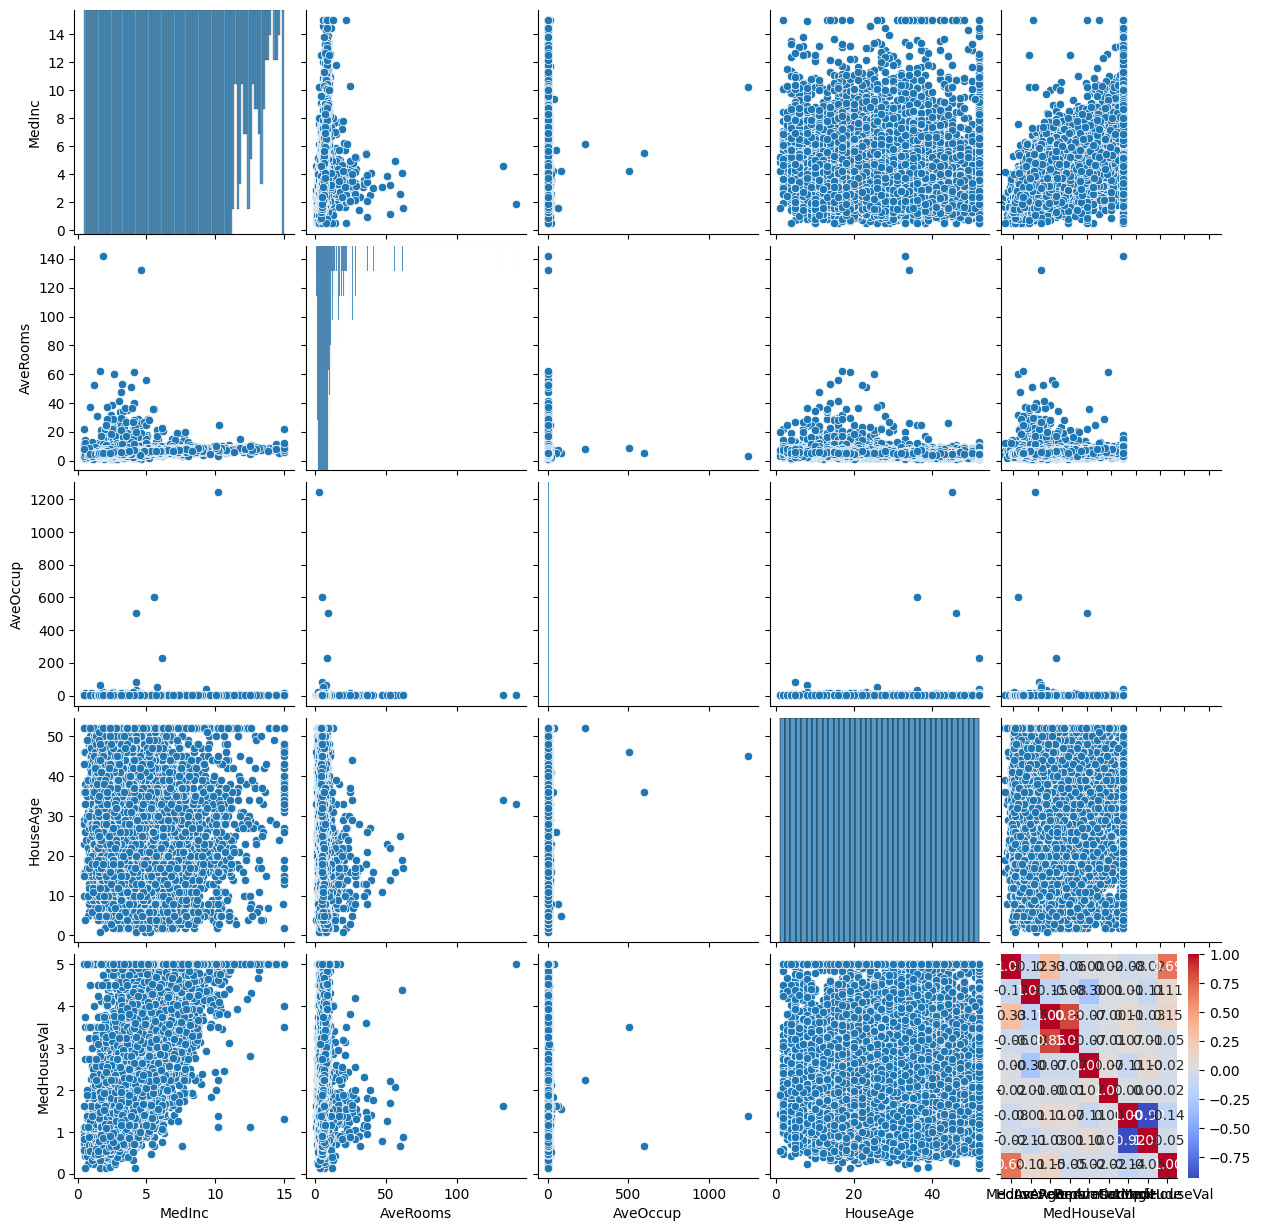

In [3]:
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")


In [4]:
# Train-test split
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Short pipeline for preprocessing and model training
# Linear Regression (baseline model)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("LinearRegression R²:", r2_score(y_test, y_pred_lr))

LinearRegression R²: 0.5757877060324508


In [6]:
# Ridge and Lasso regression with hyperparameter tuning

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(pipe_ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)
print("Best Ridge Parameters:", grid_ridge.best_params_)
print("Best Ridge R²:", r2_score(y_test, grid_ridge.predict(X_test)))

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

print("Best Lasso Parameters:", grid_lasso.best_params_)
print("Best Lasso R²:", r2_score(y_test, grid_lasso.predict(X_test)))


Best Ridge Parameters: {'ridge__alpha': 0.01}
Best Ridge R²: 0.5757879873121599
Best Lasso Parameters: {'lasso__alpha': 0.001}
Best Lasso R²: 0.576856256870568


Best Decision Tree Parameters: {'dt__max_depth': 7, 'dt__min_samples_split': 2}
Best Decision Tree R²: 0.6515700686011479


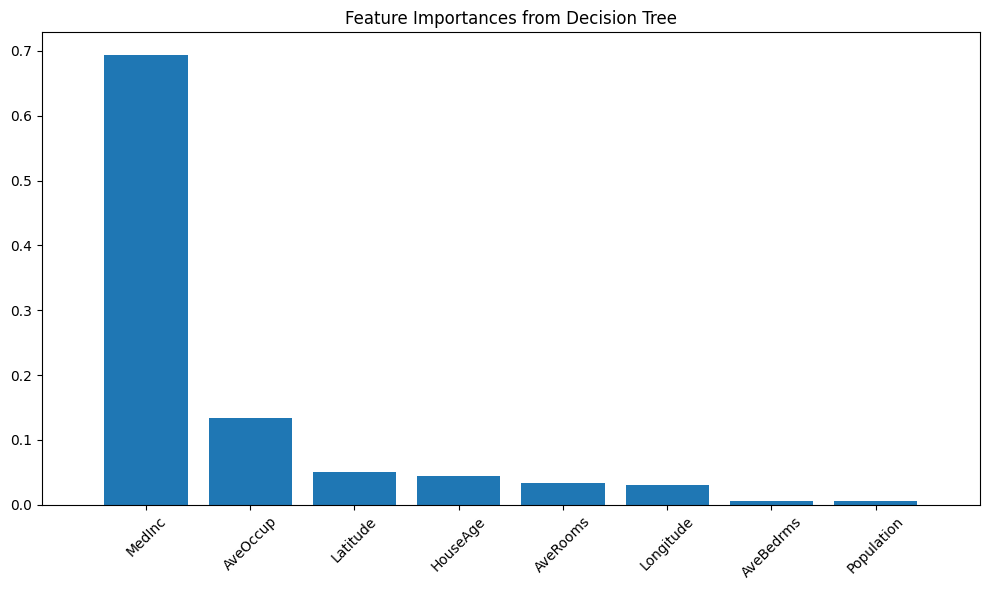

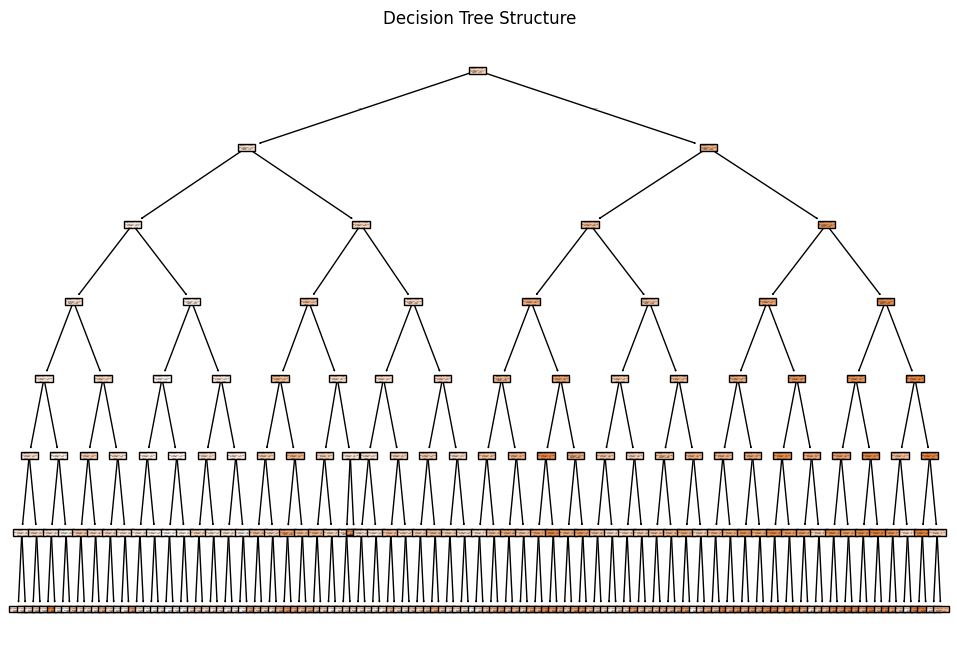

In [7]:
# Decision Tree Regression with hyperparameter tuning

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42))
])
param_grid_dt = {
    'dt__max_depth': [3, 5, 7],
    'dt__min_samples_split': [2, 5]
}
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='r2')
grid_dt.fit(X_train, y_train)
print("Best Decision Tree Parameters:", grid_dt.best_params_)
print("Best Decision Tree R²:", r2_score(y_test, grid_dt.predict(X_test)))

# Visualize feature importance from Decision Tree
importances = grid_dt.best_estimator_.named_steps['dt'].feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(grid_dt.best_estimator_.named_steps['dt'], feature_names=X.columns, filled=True)
plt.title("Decision Tree Structure")
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Random Forest Parameters: {'rf__max_depth': 7, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best Random Forest R²: 0.7118353521197224


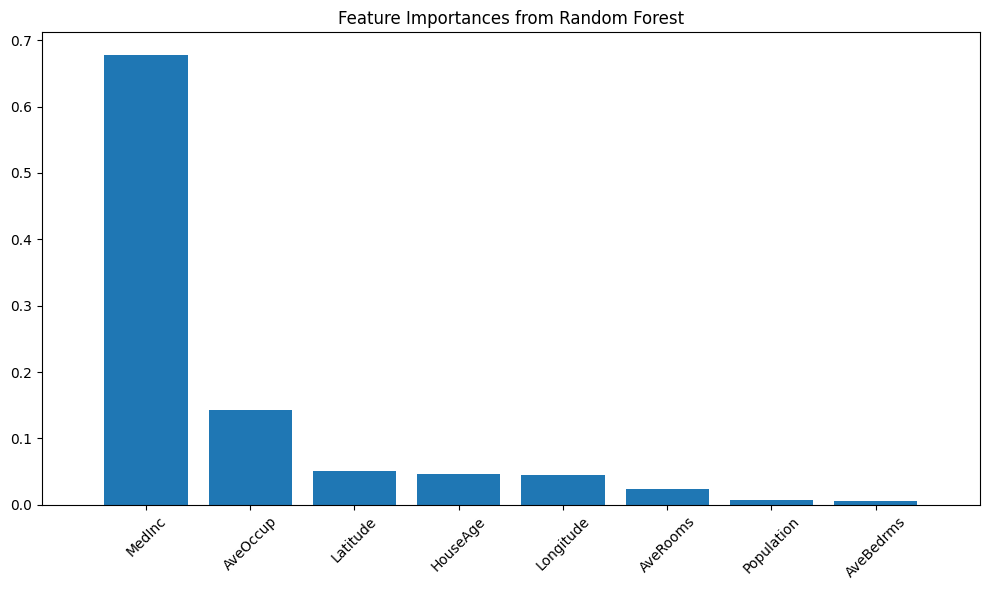

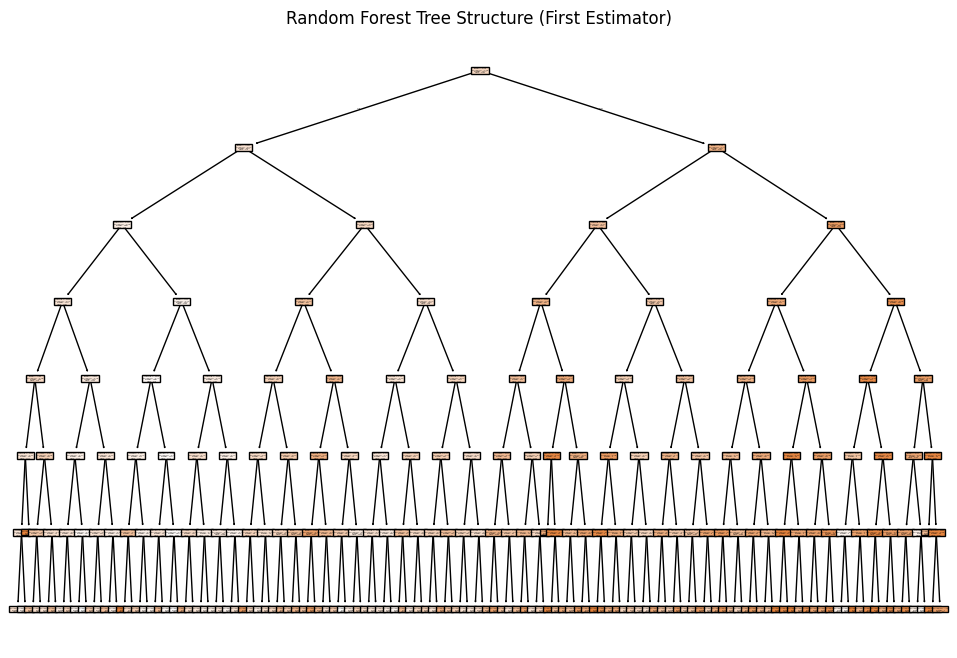

In [8]:
# Random Forest Regression with hyperparameter tuning
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_split': [2, 5]
}   
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest R²:", r2_score(y_test, grid_rf.predict(X_test)))

# Visualize feature importance from Random Forest
importances_rf = grid_rf.best_estimator_.named_steps['rf'].feature_importances_
feature_names_rf = X.columns
indices_rf = np.argsort(importances_rf)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), feature_names_rf[indices_rf], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Visualize Random Forrest 
plt.figure(figsize=(12, 8))
plot_tree(grid_rf.best_estimator_.named_steps['rf'].estimators_[0], feature_names=X.columns, filled=True)
plt.title("Random Forest Tree Structure (First Estimator)")
plt.show()

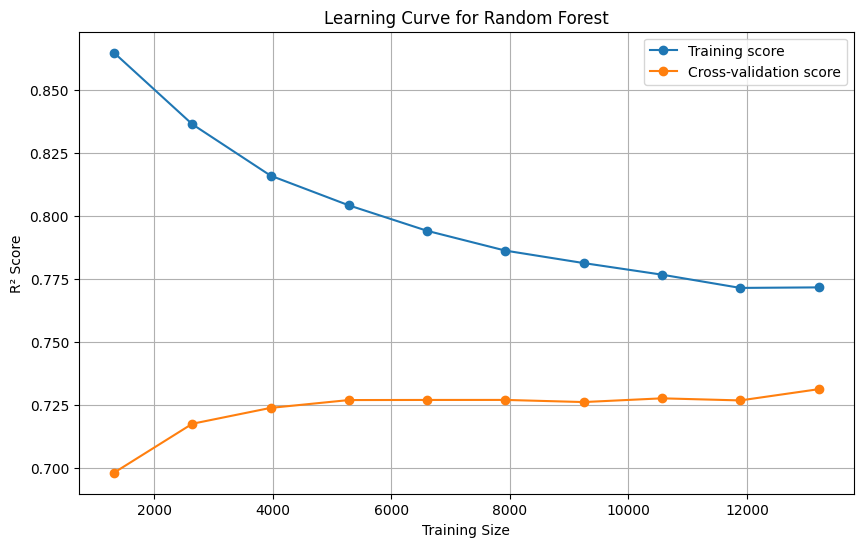

In [24]:
# Learning Curve for Random Forest
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    grid_rf.best_estimator_,
    X_train, y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', marker='o')
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

In [9]:
# SVR Regression with hyperparameter tuning

pipe_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
param_grid_svr = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

grid_svr = GridSearchCV(pipe_svr, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_svr.fit(X_train, y_train)
print("Best SVR Parameters:", grid_svr.best_params_)
print("Best SVR R²:", r2_score(y_test, grid_svr.predict(X_test)))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVR Parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}
Best SVR R²: 0.7529800406100784


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Gradient Boosting Parameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 7, 'gbr__n_estimators': 200}
Best Gradient Boosting R²: 0.8419827133638143


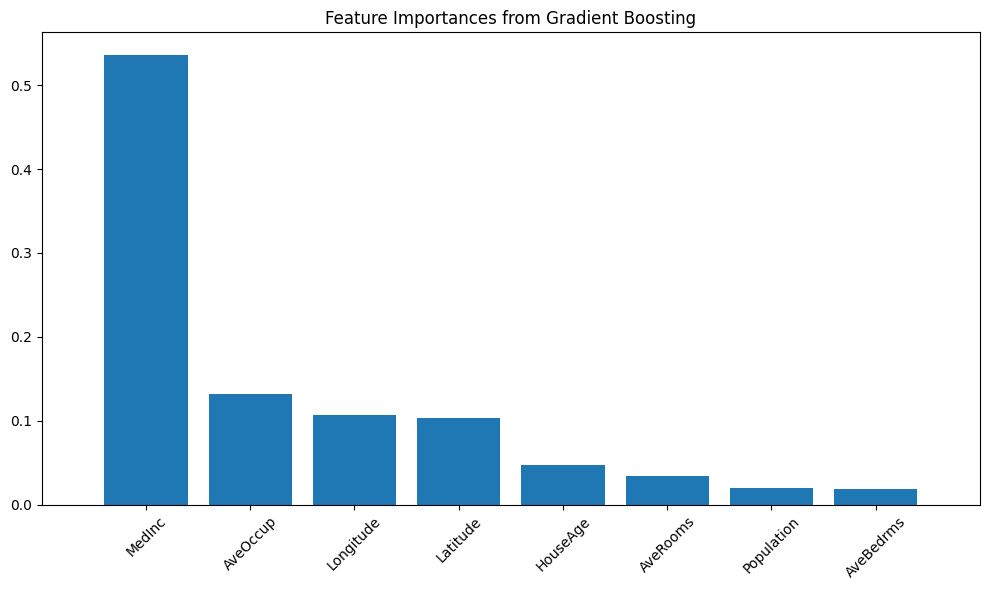

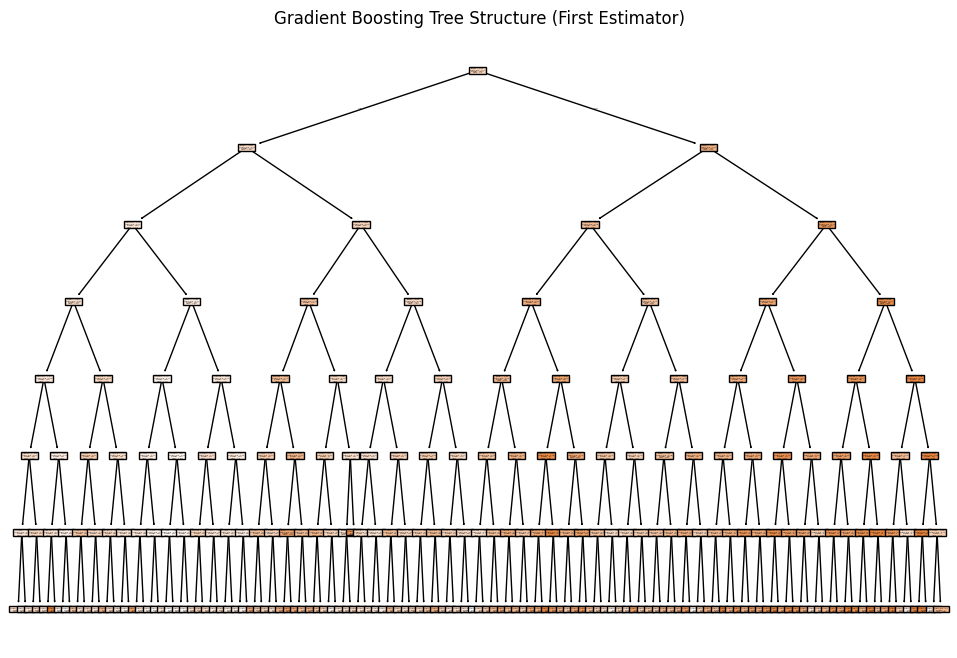

In [10]:
# Gradient Boosting Regression with hyperparameter tuning
pipe_gbr = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

param_grid_gbr = {
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.01, 0.1, 0.2],
    'gbr__max_depth': [3, 5, 7]
}
grid_gbr = GridSearchCV(pipe_gbr, param_grid_gbr, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_gbr.fit(X_train, y_train)  
print("Best Gradient Boosting Parameters:", grid_gbr.best_params_)
print("Best Gradient Boosting R²:", r2_score(y_test, grid_gbr.predict(X_test)))

# Visualize feature importance from Gradient Boosting
importances_gbr = grid_gbr.best_estimator_.named_steps['gbr'].feature_importances_
feature_names_gbr = X.columns
indices_gbr = np.argsort(importances_gbr)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Gradient Boosting")
plt.bar(range(X.shape[1]), importances_gbr[indices_gbr], align='center')
plt.xticks(range(X.shape[1]), feature_names_gbr[indices_gbr], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Visualize Gradient Boosting tree structure
plt.figure(figsize=(12, 8))
plot_tree(grid_gbr.best_estimator_.named_steps['gbr'].estimators_[0, 0], feature_names=X.columns, filled=True)
plt.title("Gradient Boosting Tree Structure (First Estimator)")
plt.show()



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best XGBoost Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Best XGBoost R²: 0.8409181226688989


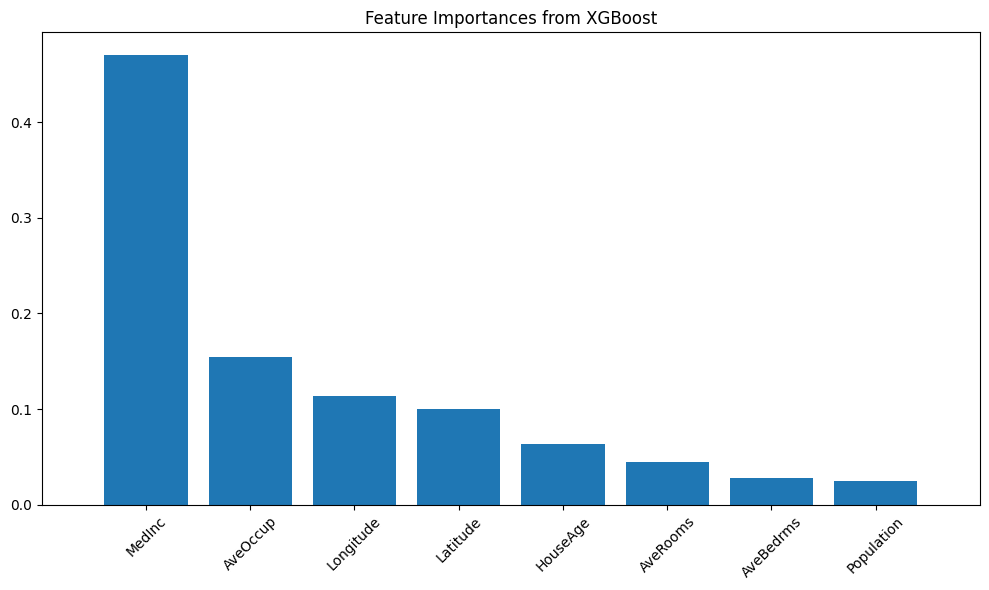

In [14]:
# XGBoost Regression with hyperparameter tuning
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42, n_jobs=-1))
])
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGBoost R²:", r2_score(y_test, grid_xgb.predict(X_test)))

# Visualize feature importance from XGBoost
importances_xgb = grid_xgb.best_estimator_.named_steps['xgb'].feature_importances_
feature_names_xgb = X.columns
indices_xgb = np.argsort(importances_xgb)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from XGBoost")
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb], align='center')
plt.xticks(range(X.shape[1]), feature_names_xgb[indices_xgb], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

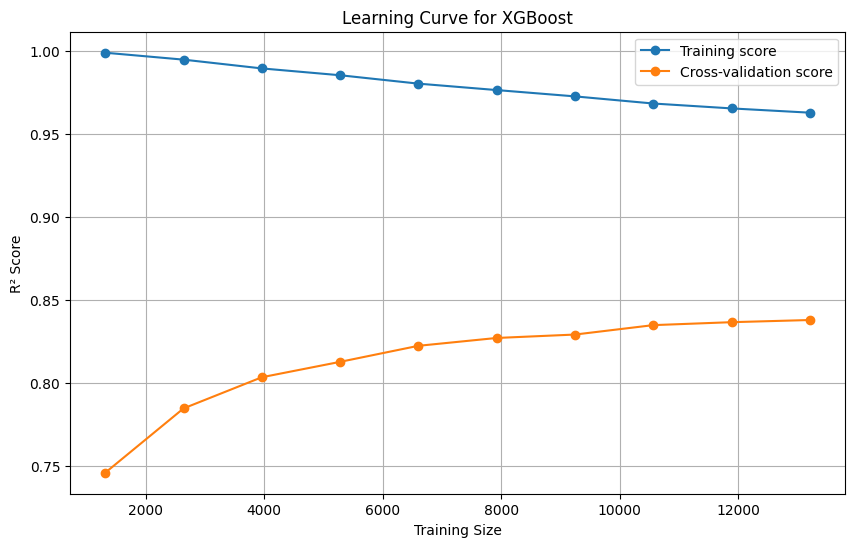

c:\Users\nicol\anaconda3\envs\mon_env\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\nicol\anaconda3\envs\mon_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nicol\anaconda3\envs\mon_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nicol\anaconda3\envs\mon_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                      

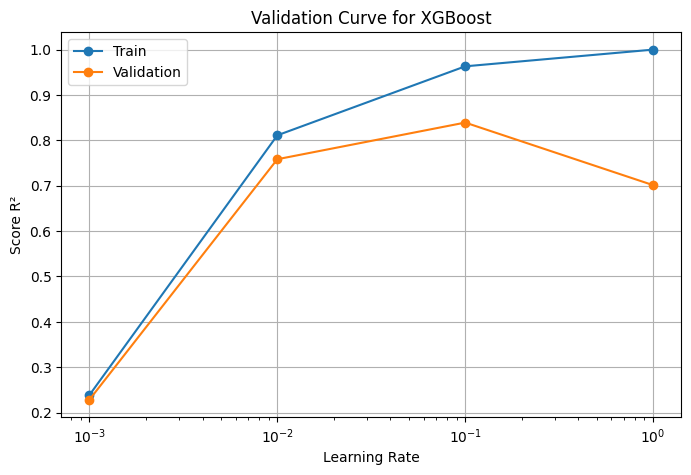

In [27]:
# Learning Curve for XGBoost
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    grid_xgb.best_estimator_,
    X_train, y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', marker='o')
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 2, 6)
train_scores, val_scores = validation_curve(
    grid_xgb.best_estimator_, X_train, y_train,
    param_name='xgb__learning_rate', param_range=param_range,
    cv=5, scoring='r2'
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.semilogx(param_range, train_scores_mean, label="Train", marker='o')
plt.semilogx(param_range, val_scores_mean, label="Validation", marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Score R²")
plt.title("Validation Curve for XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Results summary
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree Regression",
        "Random Forest Regression",
        "SVR",
        "Gradient Boosting Regression",
        "XGBoost Regression"
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, grid_ridge.predict(X_test)),
        r2_score(y_test, grid_lasso.predict(X_test)),
        r2_score(y_test, grid_dt.predict(X_test)),
        r2_score(y_test, grid_rf.predict(X_test)),
        r2_score(y_test, grid_svr.predict(X_test)),
        r2_score(y_test, grid_gbr.predict(X_test)),
        r2_score(y_test, grid_xgb.predict(X_test))
    ]
})
results.sort_values(by="R² Score", ascending=False)


,Model,R² Score
6,Gradient Boosting Regression,0.841983
7,XGBoost Regression,0.840918
5,SVR,0.752980
4,Random Forest Regression,0.711835
3,Decision Tree Regression,0.651570
2,Lasso Regression,0.576856
1,Ridge Regression,0.575788
0,Linear Regression,0.575788


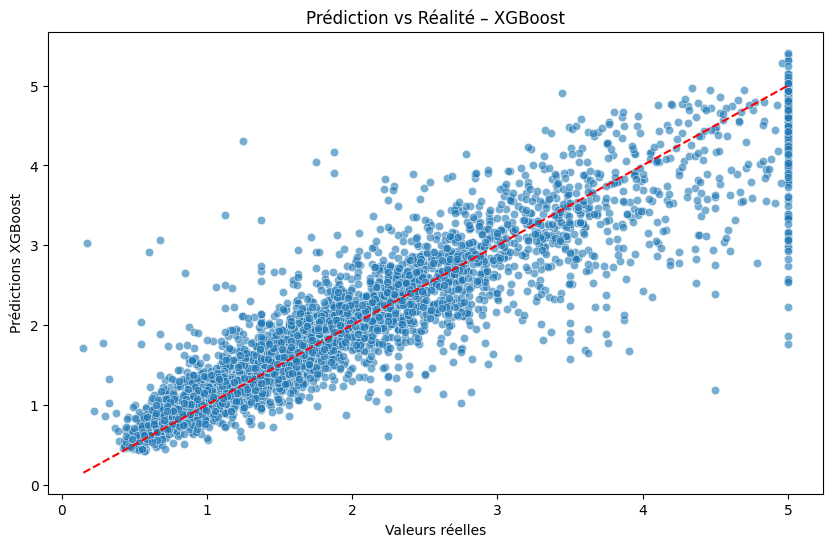

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=grid_xgb.predict(X_test), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions XGBoost")
plt.title("Prédiction vs Réalité – XGBoost")
plt.show()


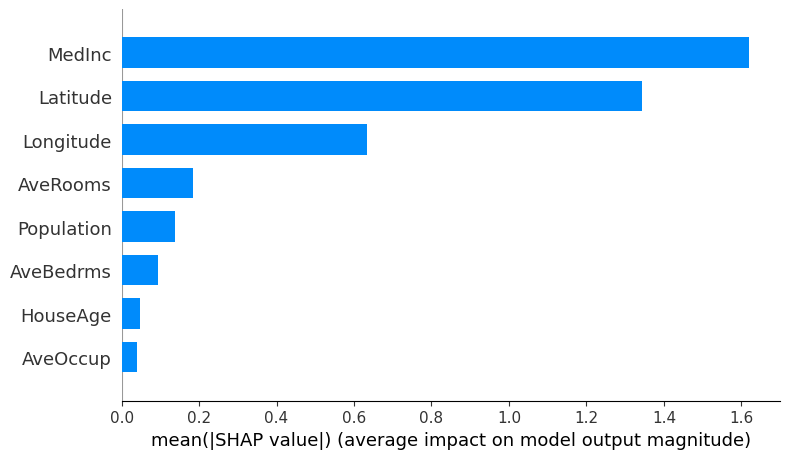

In [19]:
# Explainable AI with SHAP values
import shap
# Initialize SHAP explainer
explainer = shap.Explainer(grid_xgb.best_estimator_.named_steps['xgb'])
shap_values = explainer(X_train)
# Visualize SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

## 🎯 Conclusion

- Le modèle XGBoost a obtenu la meilleure performance avec un R² de 0.84 sur l'ensemble de test
- La learning curve permet de verifier qu'on a évité l’overfitting et que le modèle généralise bien
- La validation curve permet de trouver la valeur de learning rate optimal pour ce jeu de données
- Les features les plus importantes sont MedianIncome et Latitude (SHAP)


In [22]:
# Save the best model
import joblib
joblib.dump(grid_xgb.best_estimator_, 'xgb_model.joblib')

['xgb_model.joblib']